In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


In [3]:
data.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [4]:
#to find numercial values
num_col = data.select_dtypes(include = ['int64','float64']).columns
print(num_col)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
#to find mean, median, mode and standard deviation of numerical columns
for col in num_col:
  print(f'Columns:{col}')
  print(f'Mean :{data[col].mean()}')
  print(f'Median :{data[col].median()}')
  print(f'Mode :{data[col].mode()[0]}')
  print(f'Standard Deviation :{data[col].std()}')
  print('\n---------------------------\n')


Columns:Volume
Mean :5.066666666666666
Median :4.0
Mode :3
Standard Deviation :4.231602391213926

---------------------------

Columns:Avg Price
Mean :10453.433333333332
Median :1450.0
Mode :400
Standard Deviation :18079.90483993645

---------------------------

Columns:Total Sales Value
Mean :33812.83555555555
Median :5700.0
Mode :24300
Standard Deviation :50535.07417255328

---------------------------

Columns:Discount Rate (%)
Mean :15.15524189526222
Median :16.57776565
Mode :5.007822189
Standard Deviation :4.220602153266692

---------------------------

Columns:Discount Amount
Mean :3346.4994243526
Median :988.93373325
Mode :69.17794229
Standard Deviation :4509.902963308047

---------------------------

Columns:Net Sales Value
Mean :30466.33613109089
Median :4677.7880595
Mode :326.9748006
Standard Deviation :46358.65662389911

---------------------------



In [6]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

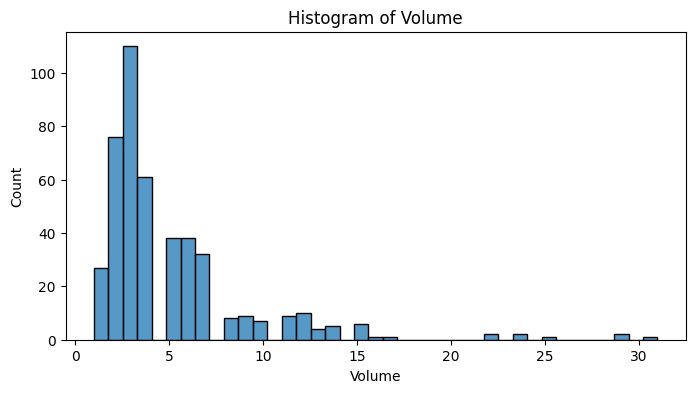

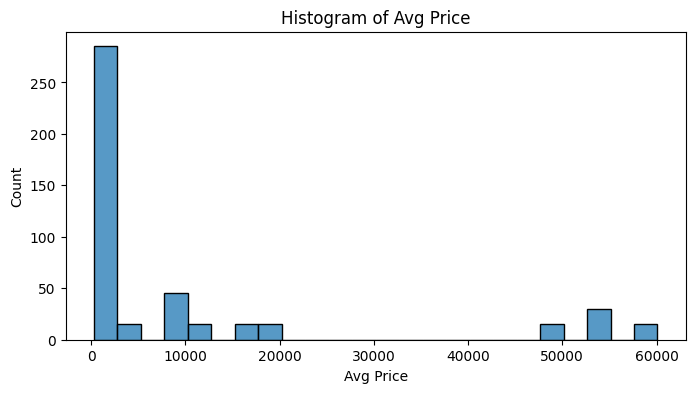

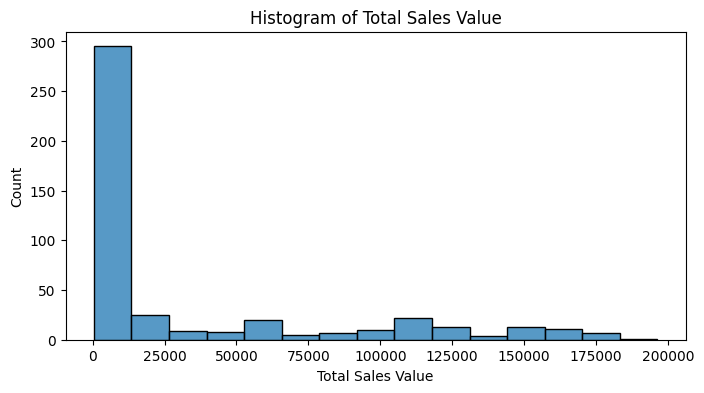

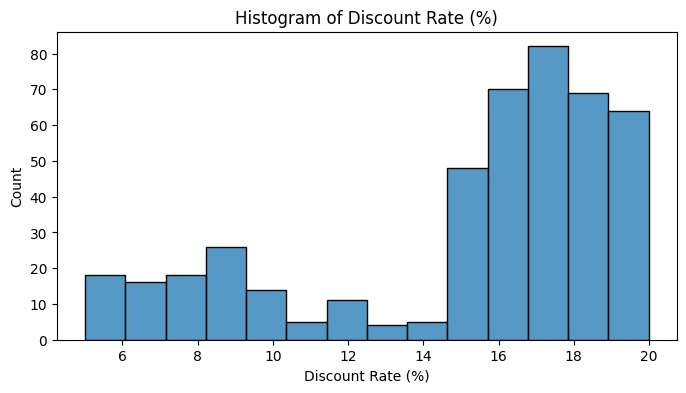

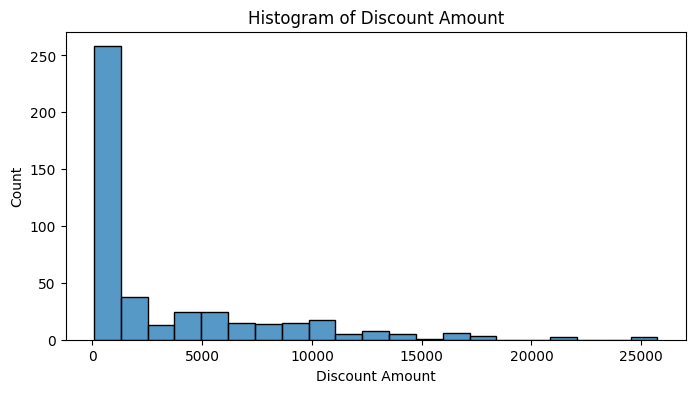

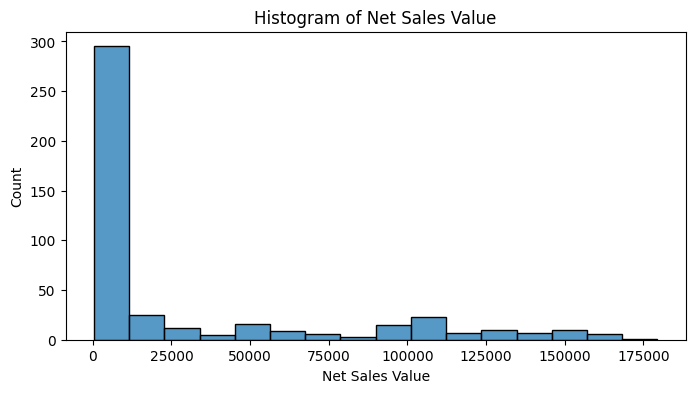

In [8]:
# Plot histograms for numerical columns
for col in num_col:
  plt.figure(figsize = (8,4))
  sns.histplot(data[col])
  plt.title(f'Histogram of {col}')
  plt.show()

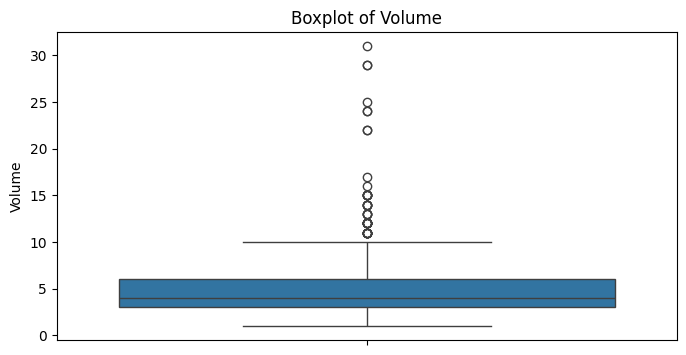

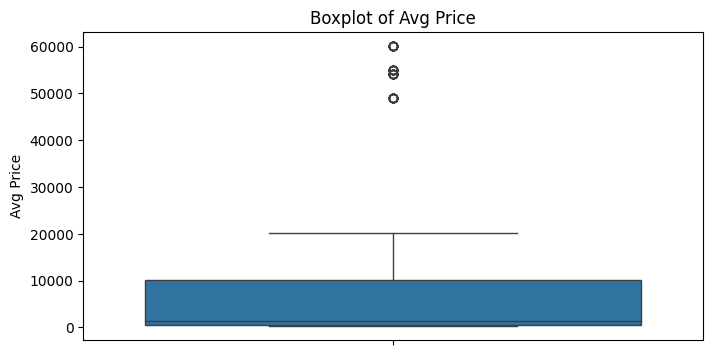

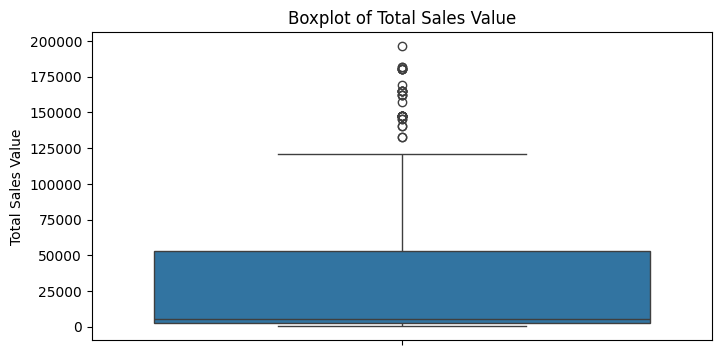

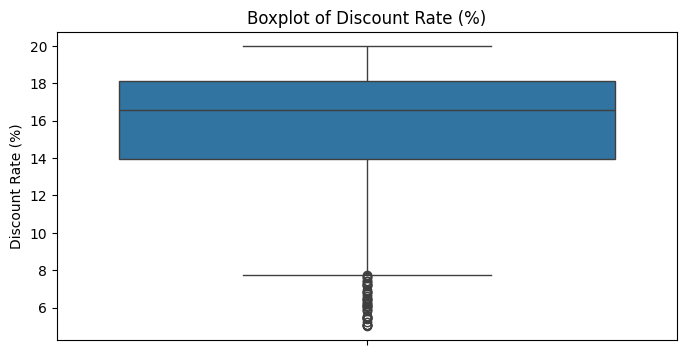

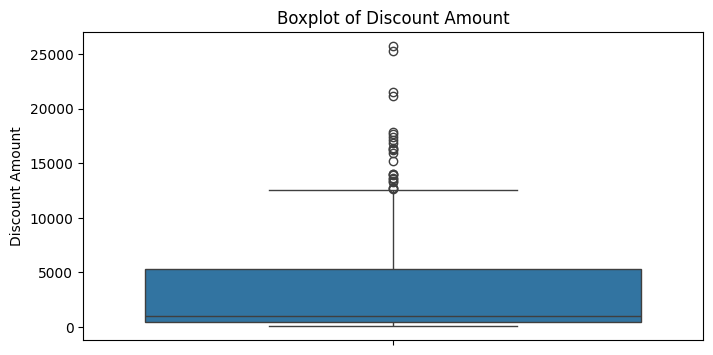

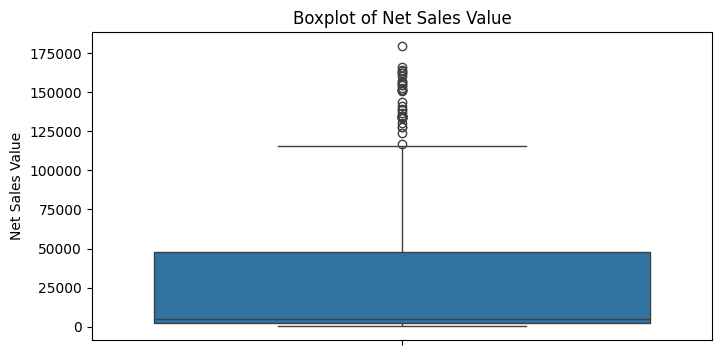

In [9]:
# Plot boxplots for numerical columns
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

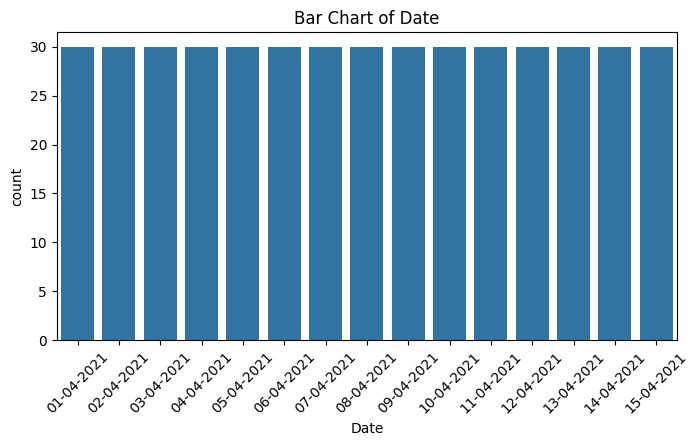

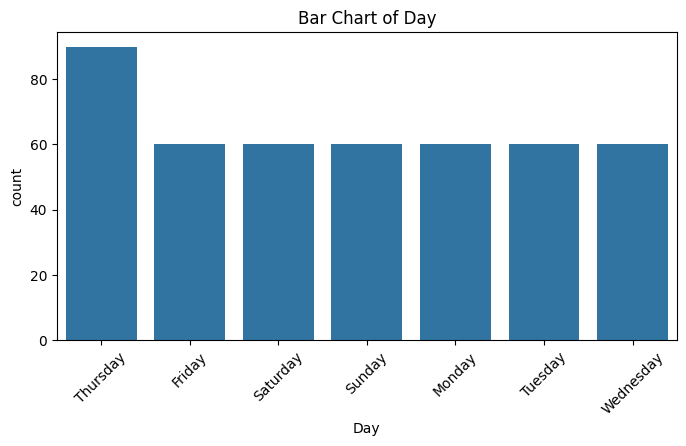

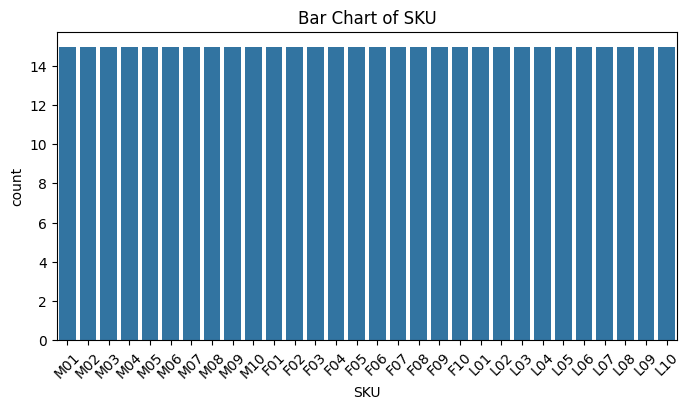

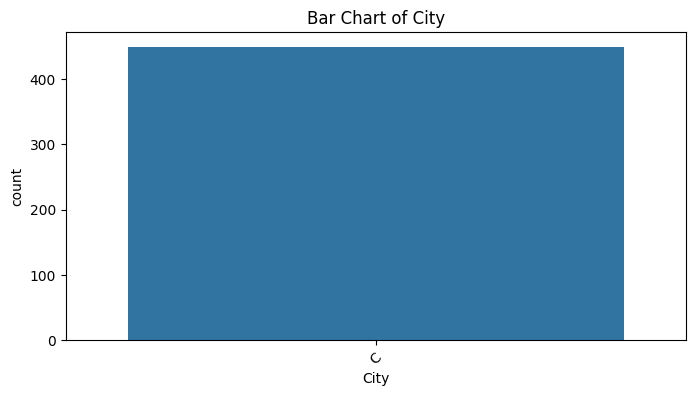

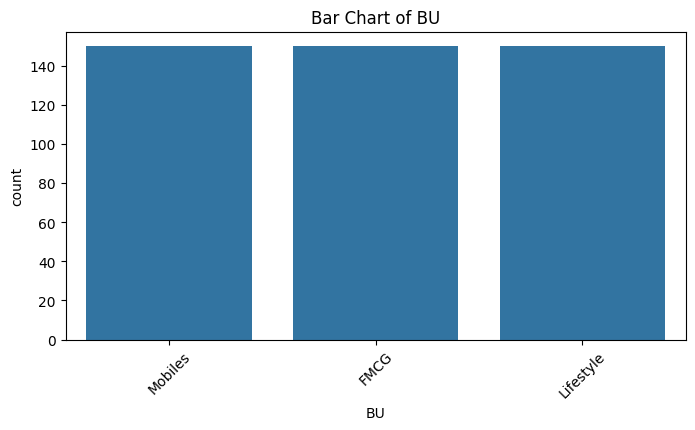

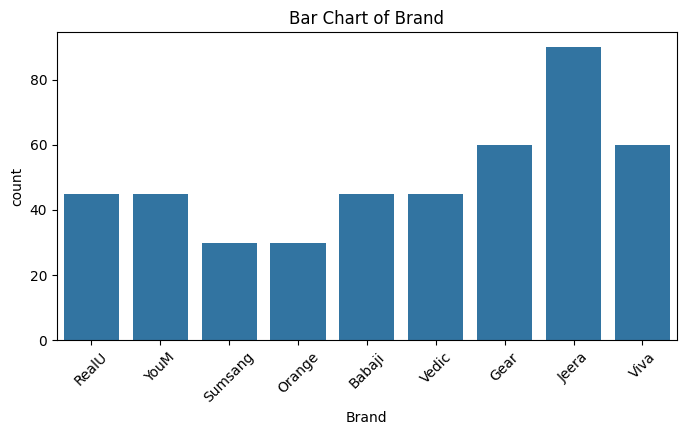

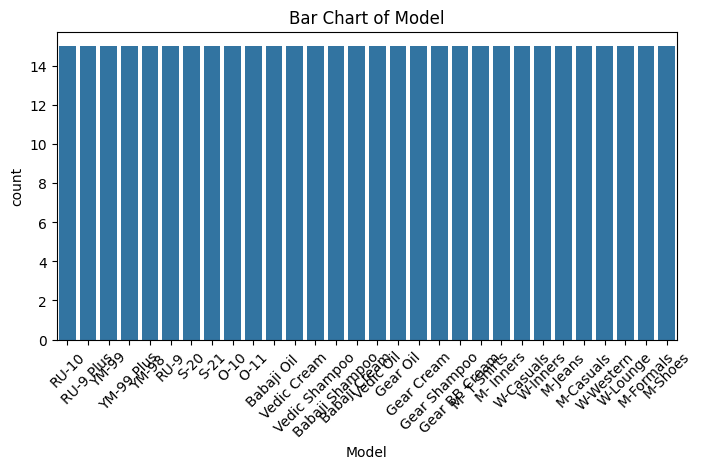

In [16]:
# Bar Charts for Categorical Columns
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Identify categorical columns
cat_col = data.select_dtypes(include=['object']).columns

# Plot bar charts
for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
data.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [12]:
#to find Categorical values
categorical_col = data.select_dtypes(include = ['object']).columns
print(categorical_col)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


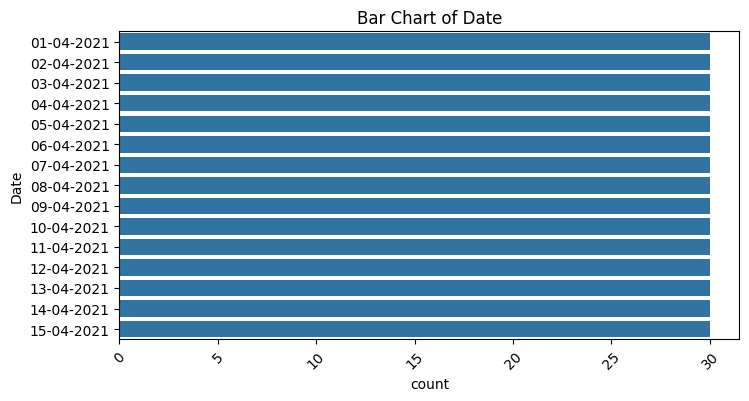

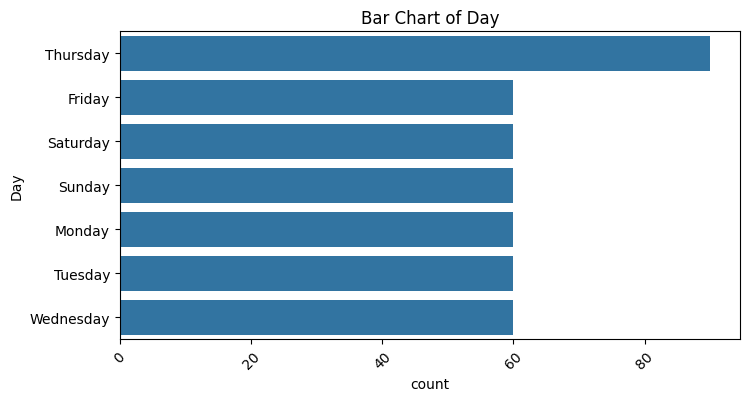

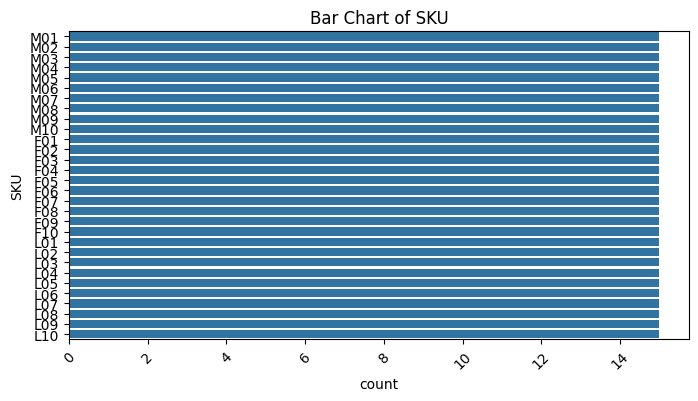

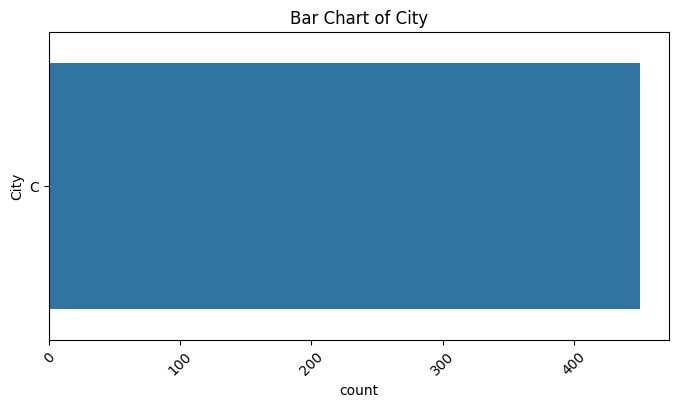

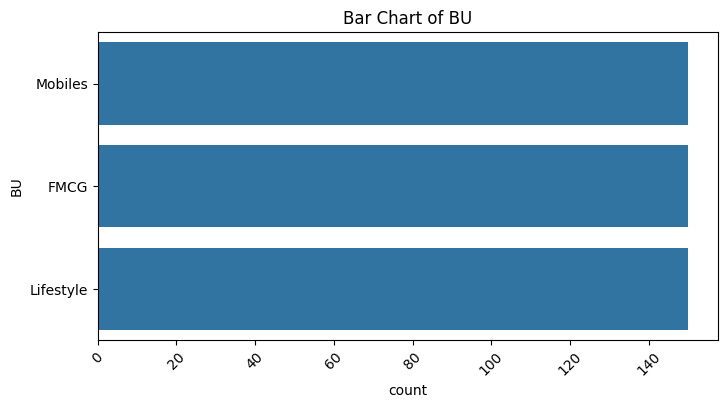

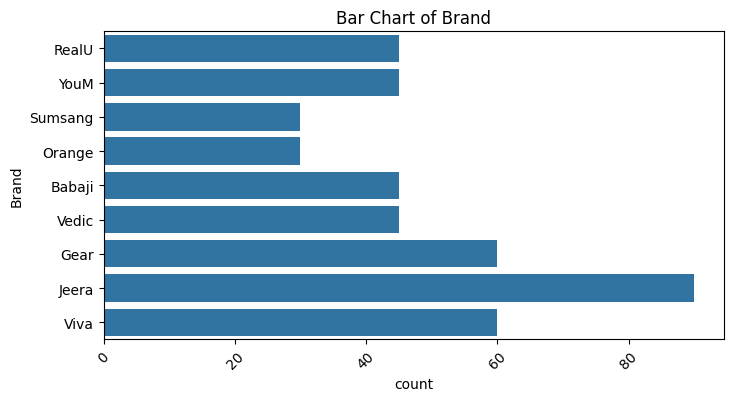

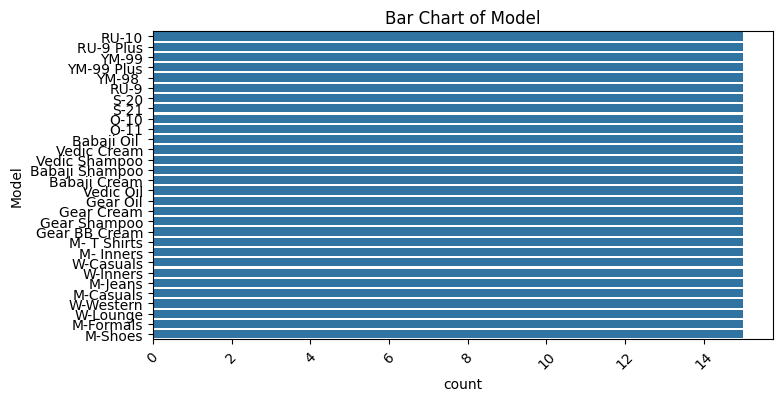

In [13]:
# Plot bar charts for categorical columns
for col in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)

In [14]:
#standardization of numercial values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_standardized = data.copy()
data_standardized[num_col] = scaler.fit_transform(data[num_col])

print(data_standardized.head())


         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  2.350029  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  1.167129  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.457388  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.220808  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C -0.488932  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.091173           2.925721          -0.830289         3.952816   
1  -0.019570           1.330995          -0.852661         1.849014   
2   0.312659           1.562775          -1.351631         1.622995   
3   0.534146           1.719276          -1.949723         1.113807   
4  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.22759

In [15]:
#Conversion of Categorical Data into Dummy Variables

print("Original Dataset:")
print(data.head())

data_encoded = pd.get_dummies(data, columns=categorical_col)

print("\nTransformed Dataset (One-Hot Encoded):")
print(data_encoded.head())

Original Dataset:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102960   
2      16100             112700           9.456886     10657.910160   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0     160346.50120  
1      89323.89704  
2     102042.08980  
3     112235.92530  
4      1992